### Section 0: Import

In [1]:
from pysb import *
from pysb.bng import generate_network, generate_equations
from pysb.export import export
from pysb.simulator import BngSimulator, KappaSimulator
from pysb.pathfinder import set_path

import seaborn
import matplotlib.pyplot as plt
from pylab import linspace, plot, xlabel, ylabel, show

palette = seaborn.color_palette('colorblind')
set_path('bng', '/opt/git-repositories/bionetgen.RuleWorld/bng2/')
set_path('kasim', '/opt/git-repositories/KaSim4.Kappa-Dev/')

### Section 1: Define Model

In [2]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7f6371448f98>

In [3]:
# Define model components
Monomer('met', ['name', 'loc', 'prot'], 
    { 'name' : ['alpha_GALACTOSE', 'CPD_3801', 'ACETYL_COA', 'CO_A', 'CPD_3561', 'beta_lactose', 
                'PROTON', 'alpha_ALLOLACTOSE', 'WATER', 'alpha_glucose', 'D_ARABINOSE', 
                '_6_Acetyl_beta_D_Galactose', 'CPD_3785', 'Fructofuranose', 'MELIBIOSE', 
                'alpha_lactose', 'beta_ALLOLACTOSE', 'beta_glucose', 'beta_GALACTOSE', 'CAMP'], 
      'loc' : ['cyt', 'per', 'ex']})

Monomer('dna', ['name', 'type', 'prot', 'up', 'dw'], 
    { 'name' : ['lacZ', 'lacY', 'lacA'], 
      'type' : ['pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('rna', ['name', 'type', 'prot'], 
    { 'name' : ['lacZ', 'lacY', 'lacA'], 
      'type' : ['pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('prot', ['name', 'dna', 'met', 'prot', 'rna', 'up', 'dw'],
    { 'name' : ['lacY', 'lacZ', 'lacA', 'lacI', 'crp'] })

Monomer('cplx', ['name', 'dna', 'prot', 'rna'], 
    { 'name' : ['RNAP', 'Ribosome']})

Monomer('cplx', ['name', 'dna', 'prot', 'rna'], {'name': ['RNAP', 'Ribosome']})

In [4]:
# Define observables and initials for metabolites
Observable('obs_MELIBIOSE_cyt', met(name = 'MELIBIOSE', loc = 'cyt', prot = None))
Observable('obs_MELIBIOSE_per', met(name = 'MELIBIOSE', loc = 'per', prot = None))
Observable('obs_MELIBIOSE_ex', met(name = 'MELIBIOSE', loc = 'ex', prot = None))
Observable('obs_WATER_cyt', met(name = 'WATER', loc = 'cyt', prot = None))
Observable('obs_WATER_per', met(name = 'WATER', loc = 'per', prot = None))
Observable('obs_WATER_ex', met(name = 'WATER', loc = 'ex', prot = None))
Observable('obs_D_ARABINOSE_cyt', met(name = 'D_ARABINOSE', loc = 'cyt', prot = None))
Observable('obs_D_ARABINOSE_per', met(name = 'D_ARABINOSE', loc = 'per', prot = None))
Observable('obs_D_ARABINOSE_ex', met(name = 'D_ARABINOSE', loc = 'ex', prot = None))
Observable('obs_CO_A_cyt', met(name = 'CO_A', loc = 'cyt', prot = None))
Observable('obs_CO_A_per', met(name = 'CO_A', loc = 'per', prot = None))
Observable('obs_CO_A_ex', met(name = 'CO_A', loc = 'ex', prot = None))
Observable('obs_ACETYL_COA_cyt', met(name = 'ACETYL_COA', loc = 'cyt', prot = None))
Observable('obs_ACETYL_COA_per', met(name = 'ACETYL_COA', loc = 'per', prot = None))
Observable('obs_ACETYL_COA_ex', met(name = 'ACETYL_COA', loc = 'ex', prot = None))
Observable('obs_PROTON_cyt', met(name = 'PROTON', loc = 'cyt', prot = None))
Observable('obs_PROTON_per', met(name = 'PROTON', loc = 'per', prot = None))
Observable('obs_PROTON_ex', met(name = 'PROTON', loc = 'ex', prot = None))
Observable('obs_alpha_glucose_cyt', met(name = 'alpha_glucose', loc = 'cyt', prot = None))
Observable('obs_alpha_glucose_per', met(name = 'alpha_glucose', loc = 'per', prot = None))
Observable('obs_alpha_glucose_ex', met(name = 'alpha_glucose', loc = 'ex', prot = None))
Observable('obs_alpha_ALLOLACTOSE_cyt', met(name = 'alpha_ALLOLACTOSE', loc = 'cyt', prot = None))
Observable('obs_alpha_ALLOLACTOSE_per', met(name = 'alpha_ALLOLACTOSE', loc = 'per', prot = None))
Observable('obs_alpha_ALLOLACTOSE_ex', met(name = 'alpha_ALLOLACTOSE', loc = 'ex', prot = None))
Observable('obs_beta_ALLOLACTOSE_cyt', met(name = 'beta_ALLOLACTOSE', loc = 'cyt', prot = None))
Observable('obs_beta_ALLOLACTOSE_per', met(name = 'beta_ALLOLACTOSE', loc = 'per', prot = None))
Observable('obs_beta_ALLOLACTOSE_ex', met(name = 'beta_ALLOLACTOSE', loc = 'ex', prot = None))
Observable('obs_beta_GALACTOSE_cyt', met(name = 'beta_GALACTOSE', loc = 'cyt', prot = None))
Observable('obs_beta_GALACTOSE_per', met(name = 'beta_GALACTOSE', loc = 'per', prot = None))
Observable('obs_beta_GALACTOSE_ex', met(name = 'beta_GALACTOSE', loc = 'ex', prot = None))
Observable('obs_CPD_3785_cyt', met(name = 'CPD_3785', loc = 'cyt', prot = None))
Observable('obs_CPD_3785_per', met(name = 'CPD_3785', loc = 'per', prot = None))
Observable('obs_CPD_3785_ex', met(name = 'CPD_3785', loc = 'ex', prot = None))
Observable('obs_alpha_lactose_cyt', met(name = 'alpha_lactose', loc = 'cyt', prot = None))
Observable('obs_alpha_lactose_per', met(name = 'alpha_lactose', loc = 'per', prot = None))
Observable('obs_alpha_lactose_ex', met(name = 'alpha_lactose', loc = 'ex', prot = None))
Observable('obs_CPD_3801_cyt', met(name = 'CPD_3801', loc = 'cyt', prot = None))
Observable('obs_CPD_3801_per', met(name = 'CPD_3801', loc = 'per', prot = None))
Observable('obs_CPD_3801_ex', met(name = 'CPD_3801', loc = 'ex', prot = None))
Observable('obs_alpha_GALACTOSE_cyt', met(name = 'alpha_GALACTOSE', loc = 'cyt', prot = None))
Observable('obs_alpha_GALACTOSE_per', met(name = 'alpha_GALACTOSE', loc = 'per', prot = None))
Observable('obs_alpha_GALACTOSE_ex', met(name = 'alpha_GALACTOSE', loc = 'ex', prot = None))
Observable('obs_CPD_3561_cyt', met(name = 'CPD_3561', loc = 'cyt', prot = None))
Observable('obs_CPD_3561_per', met(name = 'CPD_3561', loc = 'per', prot = None))
Observable('obs_CPD_3561_ex', met(name = 'CPD_3561', loc = 'ex', prot = None))
Observable('obs_Fructofuranose_cyt', met(name = 'Fructofuranose', loc = 'cyt', prot = None))
Observable('obs_Fructofuranose_per', met(name = 'Fructofuranose', loc = 'per', prot = None))
Observable('obs_Fructofuranose_ex', met(name = 'Fructofuranose', loc = 'ex', prot = None))
Observable('obs__6_Acetyl_beta_D_Galactose_cyt', met(name = '_6_Acetyl_beta_D_Galactose', loc = 'cyt', prot = None))
Observable('obs__6_Acetyl_beta_D_Galactose_per', met(name = '_6_Acetyl_beta_D_Galactose', loc = 'per', prot = None))
Observable('obs__6_Acetyl_beta_D_Galactose_ex', met(name = '_6_Acetyl_beta_D_Galactose', loc = 'ex', prot = None))
Observable('obs_beta_lactose_cyt', met(name = 'beta_lactose', loc = 'cyt', prot = None))
Observable('obs_beta_lactose_per', met(name = 'beta_lactose', loc = 'per', prot = None))
Observable('obs_beta_lactose_ex', met(name = 'beta_lactose', loc = 'ex', prot = None))
Observable('obs_beta_glucose_cyt', met(name = 'beta_glucose', loc = 'cyt', prot = None))
Observable('obs_beta_glucose_per', met(name = 'beta_glucose', loc = 'per', prot = None))
Observable('obs_beta_glucose_ex', met(name = 'beta_glucose', loc = 'ex', prot = None))

Initial(met(name = 'CAMP', loc = 'cyt', prot = None), Parameter('t0_CAMP_cyt', 100))
# Initial(met(name = 'MELIBIOSE', loc = 'cyt', prot = None), Parameter('t0_MELIBIOSE_cyt', 0))
# Initial(met(name = 'MELIBIOSE', loc = 'per', prot = None), Parameter('t0_MELIBIOSE_per', 0))
# Initial(met(name = 'MELIBIOSE', loc = 'ex', prot = None), Parameter('t0_MELIBIOSE_ex', 0))
Initial(met(name = 'WATER', loc = 'cyt', prot = None), Parameter('t0_WATER_cyt', 100))
# Initial(met(name = 'WATER', loc = 'per', prot = None), Parameter('t0_WATER_per', 0))
# Initial(met(name = 'WATER', loc = 'ex', prot = None), Parameter('t0_WATER_ex', 0))
# Initial(met(name = 'D_ARABINOSE', loc = 'cyt', prot = None), Parameter('t0_D_ARABINOSE_cyt', 0))
# Initial(met(name = 'D_ARABINOSE', loc = 'per', prot = None), Parameter('t0_D_ARABINOSE_per', 0))
# Initial(met(name = 'D_ARABINOSE', loc = 'ex', prot = None), Parameter('t0_D_ARABINOSE_ex', 0))
# Initial(met(name = 'CO_A', loc = 'cyt', prot = None), Parameter('t0_CO_A_cyt', 0))
# Initial(met(name = 'CO_A', loc = 'per', prot = None), Parameter('t0_CO_A_per', 0))
# Initial(met(name = 'CO_A', loc = 'ex', prot = None), Parameter('t0_CO_A_ex', 0))
# Initial(met(name = 'ACETYL_COA', loc = 'cyt', prot = None), Parameter('t0_ACETYL_COA_cyt', 0))
# Initial(met(name = 'ACETYL_COA', loc = 'per', prot = None), Parameter('t0_ACETYL_COA_per', 0))
# Initial(met(name = 'ACETYL_COA', loc = 'ex', prot = None), Parameter('t0_ACETYL_COA_ex', 0))
# Initial(met(name = 'PROTON', loc = 'cyt', prot = None), Parameter('t0_PROTON_cyt', 0))
Initial(met(name = 'PROTON', loc = 'per', prot = None), Parameter('t0_PROTON_per', 100))
# Initial(met(name = 'PROTON', loc = 'ex', prot = None), Parameter('t0_PROTON_ex', 0))
# Initial(met(name = 'alpha_glucose', loc = 'cyt', prot = None), Parameter('t0_alpha_glucose_cyt', 0))
# Initial(met(name = 'alpha_glucose', loc = 'per', prot = None), Parameter('t0_alpha_glucose_per', 0))
# Initial(met(name = 'alpha_glucose', loc = 'ex', prot = None), Parameter('t0_alpha_glucose_ex', 0))
# Initial(met(name = 'alpha_ALLOLACTOSE', loc = 'cyt', prot = None), Parameter('t0_alpha_ALLOLACTOSE_cyt', 0))
# Initial(met(name = 'alpha_ALLOLACTOSE', loc = 'per', prot = None), Parameter('t0_alpha_ALLOLACTOSE_per', 0))
# Initial(met(name = 'alpha_ALLOLACTOSE', loc = 'ex', prot = None), Parameter('t0_alpha_ALLOLACTOSE_ex', 0))
# Initial(met(name = 'beta_ALLOLACTOSE', loc = 'cyt', prot = None), Parameter('t0_beta_ALLOLACTOSE_cyt', 0))
# Initial(met(name = 'beta_ALLOLACTOSE', loc = 'per', prot = None), Parameter('t0_beta_ALLOLACTOSE_per', 0))
# Initial(met(name = 'beta_ALLOLACTOSE', loc = 'ex', prot = None), Parameter('t0_beta_ALLOLACTOSE_ex', 0))
# Initial(met(name = 'beta_GALACTOSE', loc = 'cyt', prot = None), Parameter('t0_beta_GALACTOSE_cyt', 0))
# Initial(met(name = 'beta_GALACTOSE', loc = 'per', prot = None), Parameter('t0_beta_GALACTOSE_per', 0))
# Initial(met(name = 'beta_GALACTOSE', loc = 'ex', prot = None), Parameter('t0_beta_GALACTOSE_ex', 0))
# Initial(met(name = 'CPD_3785', loc = 'cyt', prot = None), Parameter('t0_CPD_3785_cyt', 0))
# Initial(met(name = 'CPD_3785', loc = 'per', prot = None), Parameter('t0_CPD_3785_per', 0))
# Initial(met(name = 'CPD_3785', loc = 'ex', prot = None), Parameter('t0_CPD_3785_ex', 0))
# Initial(met(name = 'alpha_lactose', loc = 'cyt', prot = None), Parameter('t0_alpha_lactose_cyt', 0))
# Initial(met(name = 'alpha_lactose', loc = 'per', prot = None), Parameter('t0_alpha_lactose_per', 0))
# Initial(met(name = 'alpha_lactose', loc = 'ex', prot = None), Parameter('t0_alpha_lactose_ex', 0))
# Initial(met(name = 'CPD_3801', loc = 'cyt', prot = None), Parameter('t0_CPD_3801_cyt', 0))
# Initial(met(name = 'CPD_3801', loc = 'per', prot = None), Parameter('t0_CPD_3801_per', 0))
# Initial(met(name = 'CPD_3801', loc = 'ex', prot = None), Parameter('t0_CPD_3801_ex', 0))
# Initial(met(name = 'alpha_GALACTOSE', loc = 'cyt', prot = None), Parameter('t0_alpha_GALACTOSE_cyt', 0))
# Initial(met(name = 'alpha_GALACTOSE', loc = 'per', prot = None), Parameter('t0_alpha_GALACTOSE_per', 0))
# Initial(met(name = 'alpha_GALACTOSE', loc = 'ex', prot = None), Parameter('t0_alpha_GALACTOSE_ex', 0))
# Initial(met(name = 'CPD_3561', loc = 'cyt', prot = None), Parameter('t0_CPD_3561_cyt', 0))
# Initial(met(name = 'CPD_3561', loc = 'per', prot = None), Parameter('t0_CPD_3561_per', 0))
# Initial(met(name = 'CPD_3561', loc = 'ex', prot = None), Parameter('t0_CPD_3561_ex', 0))
# Initial(met(name = 'Fructofuranose', loc = 'cyt', prot = None), Parameter('t0_Fructofuranose_cyt', 0))
# Initial(met(name = 'Fructofuranose', loc = 'per', prot = None), Parameter('t0_Fructofuranose_per', 0))
# Initial(met(name = 'Fructofuranose', loc = 'ex', prot = None), Parameter('t0_Fructofuranose_ex', 0))
# Initial(met(name = '_6_Acetyl_beta_D_Galactose', loc = 'cyt', prot = None), Parameter('t0__6_Acetyl_beta_D_Galactose_cyt', 0))
# Initial(met(name = '_6_Acetyl_beta_D_Galactose', loc = 'per', prot = None), Parameter('t0__6_Acetyl_beta_D_Galactose_per', 0))
# Initial(met(name = '_6_Acetyl_beta_D_Galactose', loc = 'ex', prot = None), Parameter('t0__6_Acetyl_beta_D_Galactose_ex', 0))
# Initial(met(name = 'beta_lactose', loc = 'cyt', prot = None), Parameter('t0_beta_lactose_cyt', 0))
Initial(met(name = 'beta_lactose', loc = 'per', prot = None), Parameter('t0_beta_lactose_per', 100))
# Initial(met(name = 'beta_lactose', loc = 'ex', prot = None), Parameter('t0_beta_lactose_ex', 0))
# Initial(met(name = 'beta_glucose', loc = 'cyt', prot = None), Parameter('t0_beta_glucose_cyt', 0))
# Initial(met(name = 'beta_glucose', loc = 'per', prot = None), Parameter('t0_beta_glucose_per', 0))
# Initial(met(name = 'beta_glucose', loc = 'ex', prot = None), Parameter('t0_beta_glucose_ex', 0))

Initial(met(name='beta_lactose', loc='per', prot=None), t0_beta_lactose_per)

In [5]:
# section 1: metabolic rules
Rule('LACTOSE_MUTAROTATION',
    met(name = 'alpha_lactose') |
    met(name = 'beta_lactose'),
    Parameter('fwd_LACTOSE_MUTAROTATION', 1e-2),
    Parameter('rvs_LACTOSE_MUTAROTATION', 1e-2))

Rule('GALACTOSE_MUTAROTATION',
    met(name = 'alpha_GALACTOSE') |
    met(name = 'beta_GALACTOSE'),
    Parameter('fwd_GALACTOSE_MUTAROTATION', 1e-2),
    Parameter('rvs_GALACTOSE_MUTAROTATION', 1e-2))

Rule('GLUCOSE_MUTAROTATION',
    met(name = 'alpha_glucose') |
    met(name = 'beta_glucose'),
    Parameter('fwd_GLUCOSE_MUTAROTATION', 1e-2),
    Parameter('rvs_GLUCOSE_MUTAROTATION', 1e-2))

Rule('TRANS_RXN_24',
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'per') +
    met(name = 'alpha_lactose', loc = 'per') |
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'cyt') +
    met(name = 'alpha_lactose', loc = 'cyt'),
    Parameter('fwd_TRANS_RXN_24', 1e-4),
    Parameter('rvs_TRANS_RXN_24', 0))

Rule('TRANS_RXN_24_beta',
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'per') +
    met(name = 'beta_lactose', loc = 'per') |
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'cyt') +
    met(name = 'beta_lactose', loc = 'cyt'),
    Parameter('fwd_TRANS_RXN_24_beta', 1e-4),
    Parameter('rvs_TRANS_RXN_24_beta', 0))

Rule('TRANS_RXN_94',
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'per') +
    met(name = 'MELIBIOSE', loc = 'per') |
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'cyt') +
    met(name = 'MELIBIOSE', loc = 'cyt'),
    Parameter('fwd_TRANS_RXN_94', 1e-4),
    Parameter('rvs_TRANS_RXN_94', 0))

Rule('RXN0_7215',
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'per') +
    met(name = 'CPD_3561', loc = 'per') |
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'cyt') +
    met(name = 'CPD_3561', loc = 'cyt'),
    Parameter('fwd_RXN0_7215', 1e-4),
    Parameter('rvs_RXN0_7215', 0))

Rule('RXN0_7217',
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'per') +
    met(name = 'CPD_3785', loc = 'per') |
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'cyt') +
    met(name = 'CPD_3785', loc = 'cyt'),
    Parameter('fwd_RXN0_7217', 1e-4),
    Parameter('rvs_RXN0_7217', 0))

Rule('RXN_17755',
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'per') +
    met(name = 'CPD_3801', loc = 'per') |
    prot(name = 'lacY') +
    met(name = 'PROTON', loc = 'cyt') +
    met(name = 'CPD_3801', loc = 'cyt'),
    Parameter('fwd_RXN_17755', 1e-4),
    Parameter('rvs_RXN_17755', 0))

Rule('BETAGALACTOSID_RXN',
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'beta_lactose', loc = 'cyt') +
    met(name = 'WATER', loc = 'cyt') |
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'beta_GALACTOSE', loc = 'cyt') +
    met(name = 'beta_glucose', loc = 'cyt'),
    Parameter('fwd_BETAGALACTOSID_RXN', 1e-2),
    Parameter('rvs_BETAGALACTOSID_RXN', 0))

Rule('BETAGALACTOSID_RXN_alpha',
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'alpha_lactose', loc = 'cyt') +
    met(name = 'WATER', loc = 'cyt') |
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'alpha_GALACTOSE', loc = 'cyt') +
    met(name = 'alpha_glucose', loc = 'cyt'),
    Parameter('fwd_BETAGALACTOSID_RXN_alpha', 1e-2),
    Parameter('rvs_BETAGALACTOSID_RXN_alpha', 0))

Rule('RXN0_5363',
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'alpha_lactose', loc = 'cyt') |
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'alpha_ALLOLACTOSE', loc = 'cyt'),
    Parameter('fwd_RXN0_5363', 1),
    Parameter('rvs_RXN0_5363', 0.01))

Rule('RXN0_5363_beta',
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'beta_lactose', loc = 'cyt') |
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'beta_ALLOLACTOSE', loc = 'cyt'),
    Parameter('fwd_RXN0_5363_beta', 1),
    Parameter('rvs_RXN0_5363_beta', 0.01))

Rule('ALLOLACTOSE_DEG_alpha',
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'alpha_ALLOLACTOSE', loc = 'cyt') +
    met(name = 'WATER', loc = 'cyt') |
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'alpha_GALACTOSE', loc = 'cyt') +
    met(name = 'alpha_glucose', loc = 'cyt'),
    Parameter('fwd_ALLOLACTOSE_DEG_alpha', 0),
    Parameter('rvs_ALLOLACTOSE_DEG_alpha', 0))

Rule('ALLOLACTOSE_DEG_beta',
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'beta_ALLOLACTOSE', loc = 'cyt') +
    met(name = 'WATER', loc = 'cyt') |
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'beta_GALACTOSE', loc = 'cyt') +
    met(name = 'beta_glucose', loc = 'cyt'),
    Parameter('fwd_ALLOLACTOSE_DEG_beta', 0),
    Parameter('rvs_ALLOLACTOSE_DEG_beta', 0))

Rule('RXN_17726',
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'CPD_3561', loc = 'cyt') +
    met(name = 'WATER', loc = 'cyt') |
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'beta_GALACTOSE', loc = 'cyt') +
    met(name = 'Fructofuranose', loc = 'cyt'),
    Parameter('fwd_RXN_17726', 1),
    Parameter('rvs_RXN_17726', 0))

Rule('RXN0_7219',
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'CPD_3785', loc = 'cyt') +
    met(name = 'WATER', loc = 'cyt') |
    prot(name = 'lacZ', up = ANY, dw = ANY) +
    met(name = 'beta_GALACTOSE', loc = 'cyt') +
    met(name = 'D_ARABINOSE', loc = 'cyt'),
    Parameter('fwd_RXN0_7219', 1),
    Parameter('rvs_RXN0_7219', 0))

Rule('GALACTOACETYLTRAN_RXN_galactose',
    prot(name = 'lacA', up = ANY, dw = ANY) +
    met(name = 'beta_GALACTOSE', loc = 'cyt') +
    met(name = 'ACETYL_COA', loc = 'cyt') |
    prot(name = 'lacA', up = ANY, dw = ANY) +
    met(name = '_6_Acetyl_beta_D_Galactose', loc = 'cyt') +
    met(name = 'CO_A', loc = 'cyt'),
    Parameter('fwd_GALACTOACETYLTRAN_RXN_galactose', 1),
    Parameter('rvs_GALACTOACETYLTRAN_RXN_galactose', 0))

Rule('GALACTOACETYLTRAN_RXN_galactose', prot(name='lacA', up=ANY, dw=ANY) + met(name='beta_GALACTOSE', loc='cyt') + met(name='ACETYL_COA', loc='cyt') | prot(name='lacA', up=ANY, dw=ANY) + met(name='_6_Acetyl_beta_D_Galactose', loc='cyt') + met(name='CO_A', loc='cyt'), fwd_GALACTOACETYLTRAN_RXN_galactose, rvs_GALACTOACETYLTRAN_RXN_galactose)

In [6]:
# section 2: protein-protein interactions
Rule('complex_assembly_rule_0',
    prot(name = 'lacZ', up = None, dw = None) +
    prot(name = 'lacZ', up = None, dw = None) |
    prot(name = 'lacZ', up = 1, dw = None) %
    prot(name = 'lacZ', up = None, dw = 1),
    Parameter('fwd_complex_assembly_rule_0', 1),
    Parameter('rvs_complex_assembly_rule_0', 0))

Rule('complex_assembly_rule_1',
    prot(name = 'lacZ', up = 1, dw = None) %
    prot(name = 'lacZ', up = None, dw = 1) +
    prot(name = 'lacZ', up = 2, dw = None) %
    prot(name = 'lacZ', up = None, dw = 2) |
    prot(name = 'lacZ', up = 1, dw = 4) %
    prot(name = 'lacZ', up = 2, dw = 1) %
    prot(name = 'lacZ', up = 3, dw = 2) %
    prot(name = 'lacZ', up = 4, dw = 3),
    Parameter('fwd_complex_assembly_rule_1', 1),
    Parameter('rvs_complex_assembly_rule_1', 0))

Rule('complex_assembly_rule_2',
    prot(name = 'lacA', up = None, dw = None) +
    prot(name = 'lacA', up = None, dw = None) |
    prot(name = 'lacA', up = 1, dw = None) %
    prot(name = 'lacA', up = None, dw = 1),
    Parameter('fwd_complex_assembly_rule_2', 1),
    Parameter('rvs_complex_assembly_rule_2', 0))

Rule('complex_assembly_rule_3',
    prot(name = 'lacA', up = None, dw = None) +
    prot(name = 'lacA', up = 1, dw = None) %
    prot(name = 'lacA', up = None, dw = 1) |
    prot(name = 'lacA', up = 1, dw = 3) %
    prot(name = 'lacA', up = 2, dw = 1) %
    prot(name = 'lacA', up = 3, dw = 2),
    Parameter('fwd_complex_assembly_rule_3', 1),
    Parameter('rvs_complex_assembly_rule_3', 0))

Rule('complex_assembly_rule_3', prot(name='lacA', up=None, dw=None) + prot(name='lacA', up=1, dw=None) % prot(name='lacA', up=None, dw=1) | prot(name='lacA', up=1, dw=3) % prot(name='lacA', up=2, dw=1) % prot(name='lacA', up=3, dw=2), fwd_complex_assembly_rule_3, rvs_complex_assembly_rule_3)

In [7]:
# section 3a: rna synthesis
Rule('docking_lacZ_pro4', cplx(name = 'RNAP', dna = None) + dna(name = 'lacZ', type = 'pro4', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro4', prot = 1), Parameter('fwd_docking_lacZ_pro4', 1), Parameter('rvs_docking_lacZ_pro4', 1))
Rule('docking_lacZ_pro3', cplx(name = 'RNAP', dna = None) + dna(name = 'lacZ', type = 'pro3', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro3', prot = 1), Parameter('fwd_docking_lacZ_pro3', 1), Parameter('rvs_docking_lacZ_pro3', 1))
Rule('docking_lacZ_pro2', cplx(name = 'RNAP', dna = None) + dna(name = 'lacZ', type = 'pro2', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro2', prot = 1), Parameter('fwd_docking_lacZ_pro2', 1), Parameter('rvs_docking_lacZ_pro2', 1))
Rule('docking_lacZ_pro1', cplx(name = 'RNAP', dna = None) + dna(name = 'lacZ', type = 'pro1', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro1', prot = 1), Parameter('fwd_docking_lacZ_pro1', 1), Parameter('rvs_docking_lacZ_pro1', 1))
# Rule('docking_lacY_pro1', cplx(name = 'RNAP', dna = None) + dna(name = 'lacY', type = 'pro1', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'pro1', prot = 1), Parameter('fwd_docking_lacY_pro1', 1), Parameter('rvs_docking_lacY_pro1', 1e-4))
Rule('falloff_lacA_ter1', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter1', prot = 1) >> cplx(name = 'RNAP', dna = None) + dna(name = 'lacA', type = 'ter1', prot = None), Parameter('fwd_falloff_lacA_ter1', 1))
Rule('falloff_lacA_ter2', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter2', prot = 1) >> cplx(name = 'RNAP', dna = None) + dna(name = 'lacA', type = 'ter2', prot = None), Parameter('fwd_falloff_lacA_ter2', 1))

Rule('sliding_lacZ_pro4', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro4', prot = 1) + None + dna(name = 'lacZ', type = 'pro3', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro3', prot = 1) + rna(name = 'lacZ', type = 'pro3', prot = None) + dna(name = 'lacZ', type = 'pro4', prot = None), Parameter('fwd_sliding_lacZ_pro4', 1))
Rule('sliding_lacZ_pro3', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro3', prot = 1) + None + dna(name = 'lacZ', type = 'pro2', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro2', prot = 1) + rna(name = 'lacZ', type = 'pro2', prot = None) + dna(name = 'lacZ', type = 'pro3', prot = None), Parameter('fwd_sliding_lacZ_pro3', 1))
Rule('sliding_lacZ_pro2', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro2', prot = 1) + None + dna(name = 'lacZ', type = 'pro1', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro1', prot = 1) + rna(name = 'lacZ', type = 'pro1', prot = None) + dna(name = 'lacZ', type = 'pro2', prot = None), Parameter('fwd_sliding_lacZ_pro2', 1))
Rule('sliding_lacZ_pro1', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro1', prot = 1) + None + dna(name = 'lacZ', type = 'rbs', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'rbs', prot = 1) + rna(name = 'lacZ', type = 'rbs', prot = None) + dna(name = 'lacZ', type = 'pro1', prot = None), Parameter('fwd_sliding_lacZ_pro1', 1))
Rule('sliding_lacZ_rbs', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'rbs', prot = 1) + None + dna(name = 'lacZ', type = 'cds', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'cds', prot = 1) + rna(name = 'lacZ', type = 'cds', prot = None) + dna(name = 'lacZ', type = 'rbs', prot = None), Parameter('fwd_sliding_lacZ_rbs', 1))
Rule('sliding_lacZ_cds', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'cds', prot = 1) + None + dna(name = 'lacY', type = 'pro1', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'pro1', prot = 1) + rna(name = 'lacY', type = 'pro1', prot = None) + dna(name = 'lacZ', type = 'cds', prot = None), Parameter('fwd_sliding_lacZ_cds', 1))
Rule('sliding_lacY_pro1', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'pro1', prot = 1) + None + dna(name = 'lacY', type = 'rbs', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'rbs', prot = 1) + rna(name = 'lacY', type = 'rbs', prot = None) + dna(name = 'lacY', type = 'pro1', prot = None), Parameter('fwd_sliding_lacY_pro1', 1))
Rule('sliding_lacY_rbs', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'rbs', prot = 1) + None + dna(name = 'lacY', type = 'cds', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'cds', prot = 1) + rna(name = 'lacY', type = 'cds', prot = None) + dna(name = 'lacY', type = 'rbs', prot = None), Parameter('fwd_sliding_lacY_rbs', 1))
Rule('sliding_lacY_cds', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'cds', prot = 1) + None + dna(name = 'lacA', type = 'rbs', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'rbs', prot = 1) + rna(name = 'lacA', type = 'rbs', prot = None) + dna(name = 'lacY', type = 'cds', prot = None), Parameter('fwd_sliding_lacY_cds', 1))
Rule('sliding_lacA_rbs', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'rbs', prot = 1) + None + dna(name = 'lacA', type = 'cds', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'cds', prot = 1) + rna(name = 'lacA', type = 'cds', prot = None) + dna(name = 'lacA', type = 'rbs', prot = None), Parameter('fwd_sliding_lacA_rbs', 1))
Rule('sliding_lacA_cds', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'cds', prot = 1) + None + dna(name = 'lacA', type = 'ter1', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter1', prot = 1) + rna(name = 'lacA', type = 'ter1', prot = None) + dna(name = 'lacA', type = 'cds', prot = None), Parameter('fwd_sliding_lacA_cds', 1))
Rule('sliding_lacA_ter1', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter1', prot = 1) + None + dna(name = 'lacA', type = 'ter2', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter2', prot = 1) + rna(name = 'lacA', type = 'ter2', prot = None) + dna(name = 'lacA', type = 'ter1', prot = None), Parameter('fwd_sliding_lacA_ter1', 1))

# section 3b: protein synthesis
Rule('dr_lacZ_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lacZ', type = 'rbs', prot = None) | cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacZ', type = 'rbs', prot = 1), Parameter('fwd_dr_lacZ_rbs', 1), Parameter('rvs_dr_lacZ_rbs', 1))
Rule('dr_lacY_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lacY', type = 'rbs', prot = None) | cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'rbs', prot = 1), Parameter('fwd_dr_lacY_rbs', 1), Parameter('rvs_dr_lacY_rbs', 1))
Rule('dr_lacA_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lacA', type = 'rbs', prot = None) | cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'rbs', prot = 1), Parameter('fwd_dr_lacA_rbs', 1), Parameter('rvs_dr_lacA_rbs', 1))
Rule('fr_lacA_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter1', prot = 1) >> cplx(name = 'Ribosome', rna = None) + rna(name = 'lacA', type = 'ter1', prot = None), Parameter('fwd_fr_lacA_ter1', 1))
Rule('fr_lacA_ter2', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter2', prot = 1) >> cplx(name = 'Ribosome', rna = None) + rna(name = 'lacA', type = 'ter2', prot = None), Parameter('fwd_fr_lacA_ter2', 1))

Rule('sr_lacZ_rbs', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacZ', type = 'rbs', prot = 1) + None + rna(name = 'lacZ', type = 'cds', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacZ', type = 'cds', prot = 1) + prot(name = 'lacZ', dna = None, met = None, prot = None, rna = None, up = None, dw = None) + rna(name = 'lacZ', type = 'cds', prot = None), Parameter('fwd_sr_lacZ_rbs', 1))
Rule('sr_lacZ_cds', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacZ', type = 'cds', prot = 1) + rna(name = 'lacY', type = 'pro1', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'pro1', prot = 1) + rna(name = 'lacZ', type = 'cds', prot = None), Parameter('fwd_sr_lacZ_cds', 1))
Rule('sr_lacY_pro1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'pro1', prot = 1) + rna(name = 'lacY', type = 'rbs', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'rbs', prot = 1) + rna(name = 'lacY', type = 'pro1', prot = None), Parameter('fwd_sr_lacY_pro1', 1))
Rule('sr_lacY_rbs', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'rbs', prot = 1) + None + rna(name = 'lacY', type = 'cds', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'cds', prot = 1) + prot(name = 'lacY', dna = None, met = None, prot = None, rna = None, up = None, dw = None) + rna(name = 'lacY', type = 'cds', prot = None), Parameter('fwd_sr_lacY_rbs', 1))
Rule('sr_lacY_cds', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'cds', prot = 1) + rna(name = 'lacA', type = 'rbs', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'rbs', prot = 1) + rna(name = 'lacY', type = 'cds', prot = None), Parameter('fwd_sr_lacY_cds', 1))
Rule('sr_lacA_rbs', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'rbs', prot = 1) + None + rna(name = 'lacA', type = 'cds', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'cds', prot = 1) + prot(name = 'lacA', dna = None, met = None, prot = None, rna = None, up = None, dw = None) + rna(name = 'lacA', type = 'cds', prot = None), Parameter('fwd_sr_lacA_rbs', 1))
Rule('sr_lacA_cds', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'cds', prot = 1) + rna(name = 'lacA', type = 'ter1', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter1', prot = 1) + rna(name = 'lacA', type = 'cds', prot = None), Parameter('fwd_sr_lacA_cds', 1))
Rule('sr_lacA_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter1', prot = 1) + rna(name = 'lacA', type = 'ter2', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter2', prot = 1) + rna(name = 'lacA', type = 'ter1', prot = None), Parameter('fwd_sr_lacA_ter1', 1))

Rule('sr_lacA_ter1', cplx(name='Ribosome', rna=1) % rna(name='lacA', type='ter1', prot=1) + rna(name='lacA', type='ter2', prot=None) >> cplx(name='Ribosome', rna=1) % rna(name='lacA', type='ter2', prot=1) + rna(name='lacA', type='ter1', prot=None), fwd_sr_lacA_ter1)

In [8]:
# section 3c: initialize dna and others
Initial(
    dna(name = 'lacZ', type = 'pro4', prot = None, up = None, dw = 1) %
    dna(name = 'lacZ', type = 'pro3', prot = None, up = 1, dw = 2) %
    dna(name = 'lacZ', type = 'pro2', prot = None, up = 2, dw = 3) %
    dna(name = 'lacZ', type = 'pro1', prot = None, up = 3, dw = 4) %
    dna(name = 'lacZ', type = 'rbs', prot = None, up = 4, dw = 5) %
    dna(name = 'lacZ', type = 'cds', prot = None, up = 5, dw = 6) %
    dna(name = 'lacY', type = 'pro1', prot = None, up = 6, dw = 7) %
    dna(name = 'lacY', type = 'rbs', prot = None, up = 7, dw = 8) %
    dna(name = 'lacY', type = 'cds', prot = None, up = 8, dw = 9) %
    dna(name = 'lacA', type = 'rbs', prot = None, up = 9, dw = 10) %
    dna(name = 'lacA', type = 'cds', prot = None, up = 10, dw = 11) %
    dna(name = 'lacA', type = 'ter1', prot = None, up = 11, dw = 12) %
    dna(name = 'lacA', type = 'ter2', prot = None, up = 12, dw = None),
    Parameter('t0_operon_lacZYA', 1))

Initial(cplx(name = 'RNAP', dna = None, prot = None, rna = None), Parameter('t0_RNAP', 1))
Observable('obs_rnap', cplx(name = 'RNAP', dna = None, rna = None))

Initial(cplx(name = 'Ribosome', dna = None, prot = None, rna = None), Parameter('t0_ribosome', 1))
Observable('obs_ribosome', cplx(name = 'Ribosome', dna = None, rna = None))

Observable('obs_ribosome', cplx(name='Ribosome', dna=None, rna=None))

In [9]:
# section 4: regulation of gene expression
Rule('ProtMet_RuleAssembly_1', 
    prot(name = 'lacI', met = None, up = None, dw = None) +
    met(name = 'beta_ALLOLACTOSE', loc = 'cyt', prot = None) | 
    prot(name = 'lacI', met = 1, up = None, dw = None) %
    met(name = 'beta_ALLOLACTOSE', loc = 'cyt', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_1', 0.1),
    Parameter('rvs_ProtMet_RuleAssembly_1', 0))

Initial(prot(name = 'lacI', dna = None, met = None, prot = None, rna = None, up = None, dw = None), Parameter('t0_lacI', 3))
Initial(prot(name = 'lacY', dna = None, met = None, prot = None, rna = None, up = None, dw = None), Parameter('t0_lacY', 1))
Initial(prot(name = 'lacZ', dna = None, met = None, prot = None, rna = None, up = None, dw = None), Parameter('t0_lacZ', 4))

# ad-hoc rules. See arabinose for more details on how to model rules
Rule('TF_TFBS_rule_1', 
    prot(name = 'lacI', dna = None, met = None) + 
    dna(name = 'lacZ', type = 'pro1', prot = None) |
    prot(name = 'lacI', dna = 1, met = None) % 
    dna(name = 'lacZ', type = 'pro1', prot = 1),
    Parameter('fwd_TF_TFBS_rule_1', 1), 
    Parameter('rvs_TF_TFBS_rule_1', 0))

Rule('TF_TFBS_rule_2', 
    prot(name = 'lacI', dna = 1, met = None) % 
    dna(name = 'lacZ', type = 'pro1', prot = 1) + 
    met(name = 'beta_ALLOLACTOSE', loc = 'cyt', prot = None) >>
    prot(name = 'lacI', dna = None, met = 1) % 
    dna(name = 'lacZ', type = 'pro1', prot = None) %
    met(name = 'beta_ALLOLACTOSE', loc = 'cyt', prot = 1), 
    Parameter('fwd_TF_TFBS_rule_2', 1))

Rule('TF_TFBS_rule_2', prot(name='lacI', dna=1, met=None) % dna(name='lacZ', type='pro1', prot=1) + met(name='beta_ALLOLACTOSE', loc='cyt', prot=None) >> prot(name='lacI', dna=None, met=1) % dna(name='lacZ', type='pro1', prot=None) % met(name='beta_ALLOLACTOSE', loc='cyt', prot=1), fwd_TF_TFBS_rule_2)

### Section 3: SImulation

In [10]:
# save model to
with open('model_lactose.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))
with open('model_lactose.bngl', 'w') as outfile:
    outfile.write(export(model, 'bngl'))

In [11]:
# required for SSA and ODE simulations
# generate_network(model)
# generate_equations(model)

In [12]:
runs = 20
# data1 = ScipyOdeSimulator(model, linspace(0, 100, 200)).run().dataframe
# data1 = BngSimulator(model, linspace(0, 200, 201)).run(method = 'ode').dataframe
data2 = KappaSimulator(model, linspace(0, 1000, 201)).run(n_runs = runs).dataframe

data = []
for i in range(runs):
    data.append(data2.xs(i))

avrg = 0
for i in range(runs):
    avrg += data[i]
avrg = avrg / runs

stdv = []
for i in range(runs):
    stdv = (data[i] - avrg)**2
stdv = (stdv / (runs-1))**0.5

data2 = data[0]

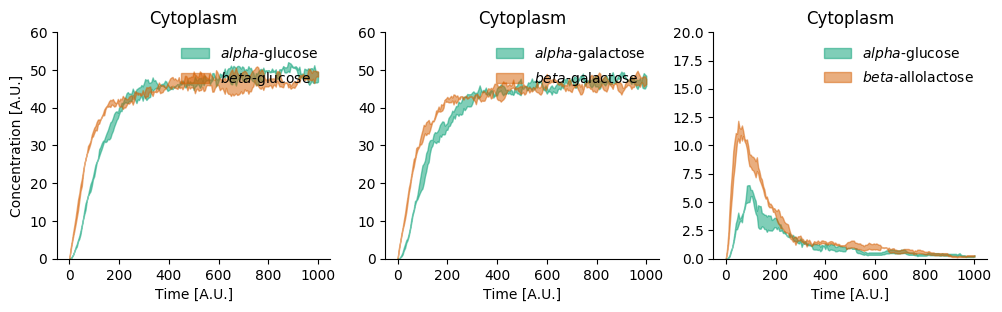

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (4*3, 3*1), dpi = 100)

ax[0].fill_between(avrg.index, 
                   avrg['obs_alpha_glucose_cyt'] + stdv['obs_alpha_glucose_cyt'], 
                   avrg['obs_alpha_glucose_cyt'] - stdv['obs_alpha_glucose_cyt'], 
                   label = r'$alpha$-glucose', **{'color' : palette[2], 'alpha' : 0.5})

ax[0].fill_between(avrg.index, 
                   avrg['obs_beta_glucose_cyt'] + stdv['obs_beta_glucose_cyt'], 
                   avrg['obs_beta_glucose_cyt'] - stdv['obs_beta_glucose_cyt'], 
                   label = r'$beta$-glucose', **{'color' : palette[3], 'alpha' : 0.5})

ax[1].fill_between(avrg.index, 
                   avrg['obs_alpha_GALACTOSE_cyt'] + stdv['obs_alpha_GALACTOSE_cyt'], 
                   avrg['obs_alpha_GALACTOSE_cyt'] - stdv['obs_alpha_GALACTOSE_cyt'], 
                   label = r'$alpha$-galactose', **{'color' : palette[2], 'alpha' : 0.5})

ax[1].fill_between(avrg.index, 
                   avrg['obs_beta_GALACTOSE_cyt'] + stdv['obs_beta_GALACTOSE_cyt'], 
                   avrg['obs_beta_GALACTOSE_cyt'] - stdv['obs_beta_GALACTOSE_cyt'], 
                   label = r'$beta$-galactose', **{'color' : palette[3], 'alpha' : 0.5})

ax[2].fill_between(avrg.index, 
                   avrg['obs_alpha_ALLOLACTOSE_cyt'] + stdv['obs_alpha_ALLOLACTOSE_cyt'], 
                   avrg['obs_alpha_ALLOLACTOSE_cyt'] - stdv['obs_alpha_ALLOLACTOSE_cyt'], 
                   label = r'$alpha$-glucose', **{'color' : palette[2], 'alpha' : 0.5})

ax[2].fill_between(avrg.index, 
                   avrg['obs_beta_ALLOLACTOSE_cyt'] + stdv['obs_beta_ALLOLACTOSE_cyt'], 
                   avrg['obs_beta_ALLOLACTOSE_cyt'] - stdv['obs_beta_ALLOLACTOSE_cyt'], 
                   label = r'$beta$-allolactose', **{'color' : palette[3], 'alpha' : 0.5})

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
ax[0].set_title('Cytoplasm')
ax[0].set_ylim(top = 60, bottom = 0)

ax[1].set_xlabel('Time [A.U.]')
ax[1].set_title('Cytoplasm')
ax[1].set_ylim(top = 60, bottom = 0)

ax[2].set_xlabel('Time [A.U.]')
ax[2].set_title('Cytoplasm')
ax[2].set_ylim(top = 20, bottom = 0)

ax[0].legend(frameon = False)
ax[1].legend(frameon = False)
ax[2].legend(frameon = False)

seaborn.despine()
plt.savefig('model_lactose_stdv.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()